In [1]:
import pandas as pd
import os

In [2]:
relativePath = os.getcwd()
dataFilePath = relativePath + "/Electricity_Consumption.csv"
df = pd.read_csv(dataFilePath)

In [3]:
df

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Power Consumption
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620
...,...,...,...,...,...,...,...
52411,12/30/2017 23:10,7.010,72.4,0.080,0.040,0.096,31160.45627
52412,12/30/2017 23:20,6.947,72.6,0.082,0.051,0.093,30430.41825
52413,12/30/2017 23:30,6.900,72.8,0.086,0.084,0.074,29590.87452
52414,12/30/2017 23:40,6.758,73.0,0.080,0.066,0.089,28958.17490


# 1.

In [4]:
df = df.drop("DateTime", axis = 1)
correlations = df.corr()
correlations

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Power Consumption
Temperature,1.000000,-0.460243,0.477109,0.460294,0.196522,0.440221
Humidity,-0.460243,1.000000,-0.135853,-0.468138,-0.256886,-0.287421
Wind Speed,0.477109,-0.135853,1.000000,0.133733,-0.000972,0.167444
general diffuse flows,0.460294,-0.468138,0.133733,1.000000,0.564718,0.187965
diffuse flows,0.196522,-0.256886,-0.000972,0.564718,1.000000,0.080274
Power Consumption,0.440221,-0.287421,0.167444,0.187965,0.080274,1.000000


<Axes: >

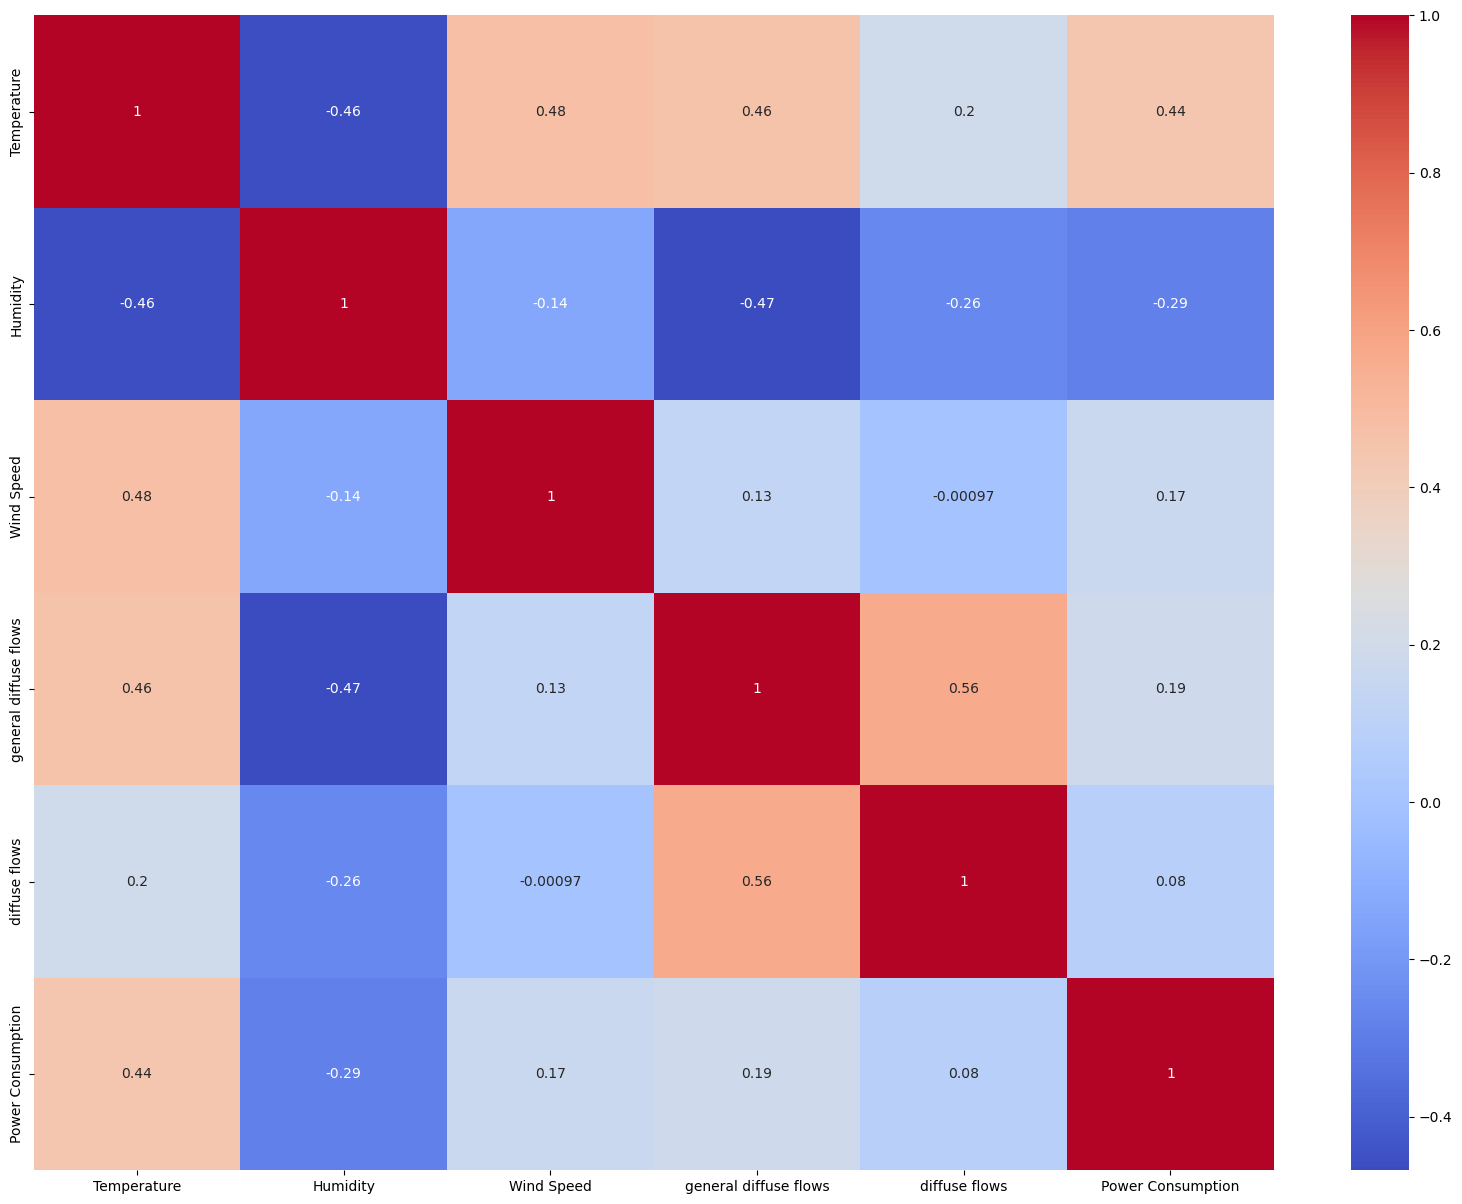

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# correlation matrix without "DateTime"
plt.figure(figsize = (20,15))
sns.heatmap(correlations, annot = True, cmap = "coolwarm")

- Resource 1: https://blog.quantinsti.com/creating-heatmap-using-python-seaborn/
- Resource 2: https://www.sfu.ca/~mjbrydon/tutorials/BAinPy/08_correlation.html
- Resource 3: https://linuxhint.com/seaborn-heatmap-colors/

In [6]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = df.columns
vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]
vif_data

,feature,VIF
0,Temperature,19.723896
1,Humidity,9.469224
2,Wind Speed,2.207631
3,general diffuse flows,2.851280
4,diffuse flows,2.017647
5,Power Consumption,20.956980


- Resource 4: https://towardsdatascience.com/everything-you-need-to-know-about-multicollinearity-2f21f082d6dc

In [7]:
df = df.drop(["Temperature"], axis = 1)
correlations = df.corr()
correlations

,Humidity,Wind Speed,general diffuse flows,diffuse flows,Power Consumption
Humidity,1.000000,-0.135853,-0.468138,-0.256886,-0.287421
Wind Speed,-0.135853,1.000000,0.133733,-0.000972,0.167444
general diffuse flows,-0.468138,0.133733,1.000000,0.564718,0.187965
diffuse flows,-0.256886,-0.000972,0.564718,1.000000,0.080274
Power Consumption,-0.287421,0.167444,0.187965,0.080274,1.000000


<Axes: >

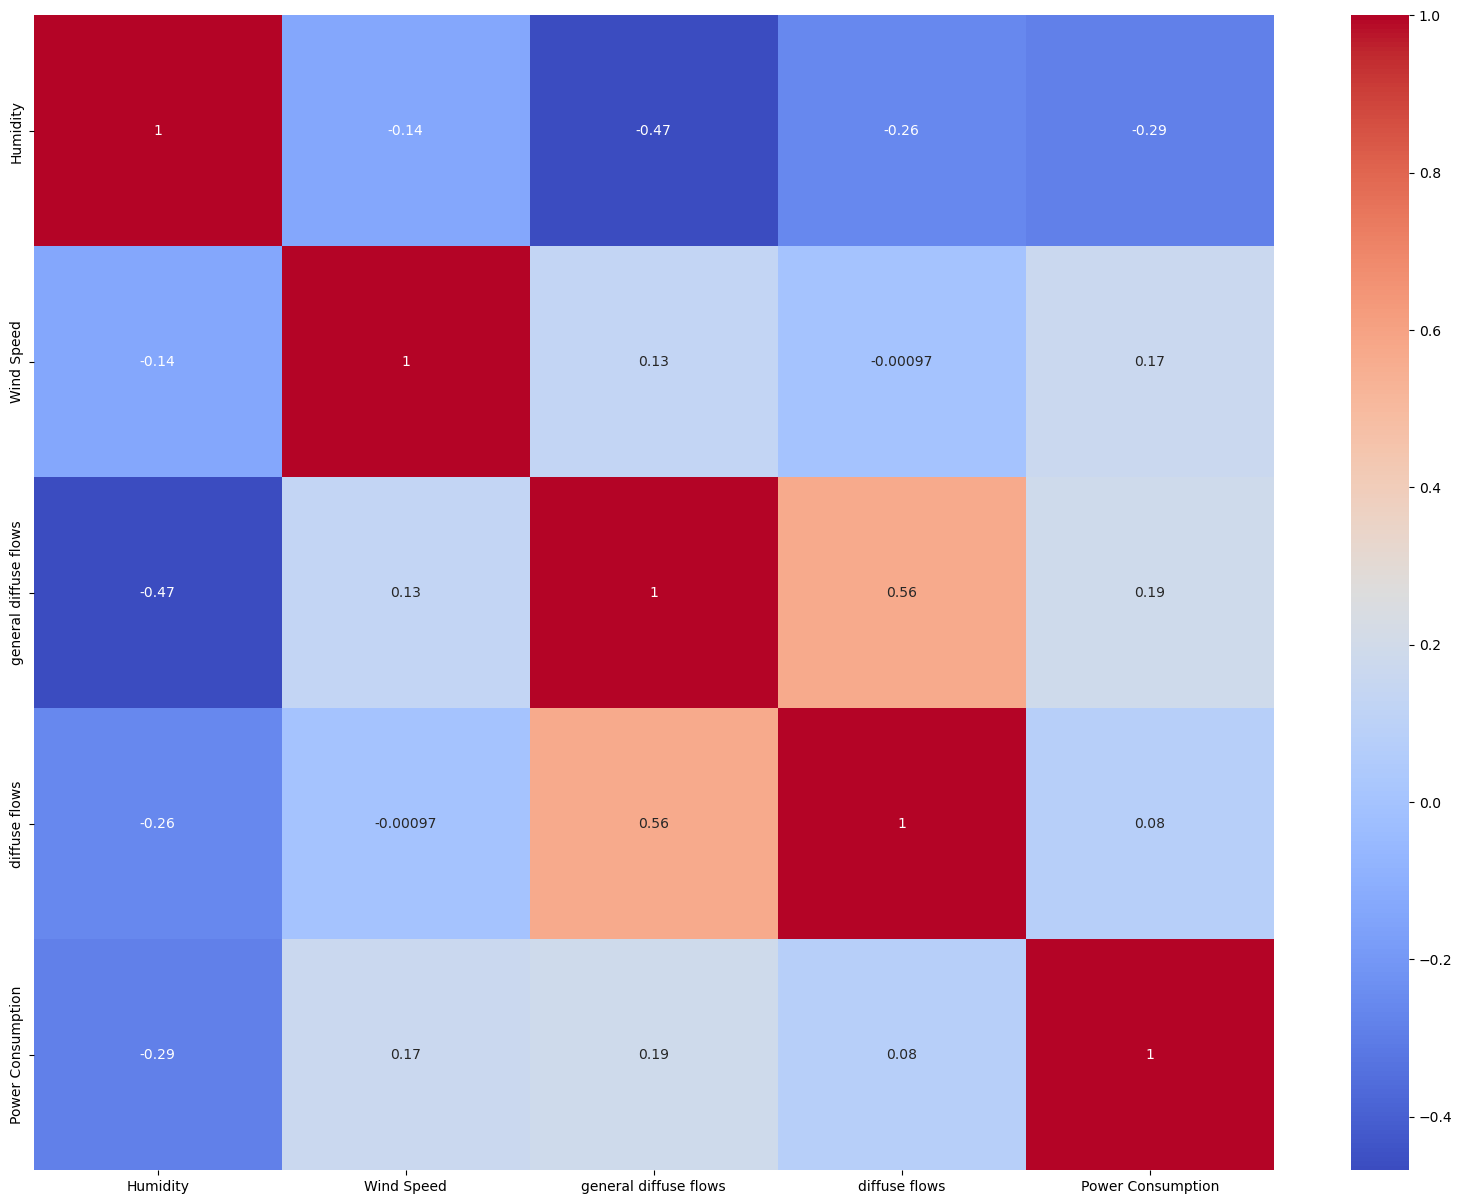

In [8]:
# correlation matrix without "Temperature" because it is highly correlated to Power Consumption
plt.figure(figsize = (20,15))
sns.heatmap(correlations, annot = True, cmap = "coolwarm")

In [9]:
vif_data = pd.DataFrame()
vif_data["feature"] = df.columns
vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]
vif_data

,feature,VIF
0,Humidity,9.245712
1,Wind Speed,1.777631
2,general diffuse flows,2.464502
3,diffuse flows,2.016713
4,Power Consumption,11.680448


<Axes: >

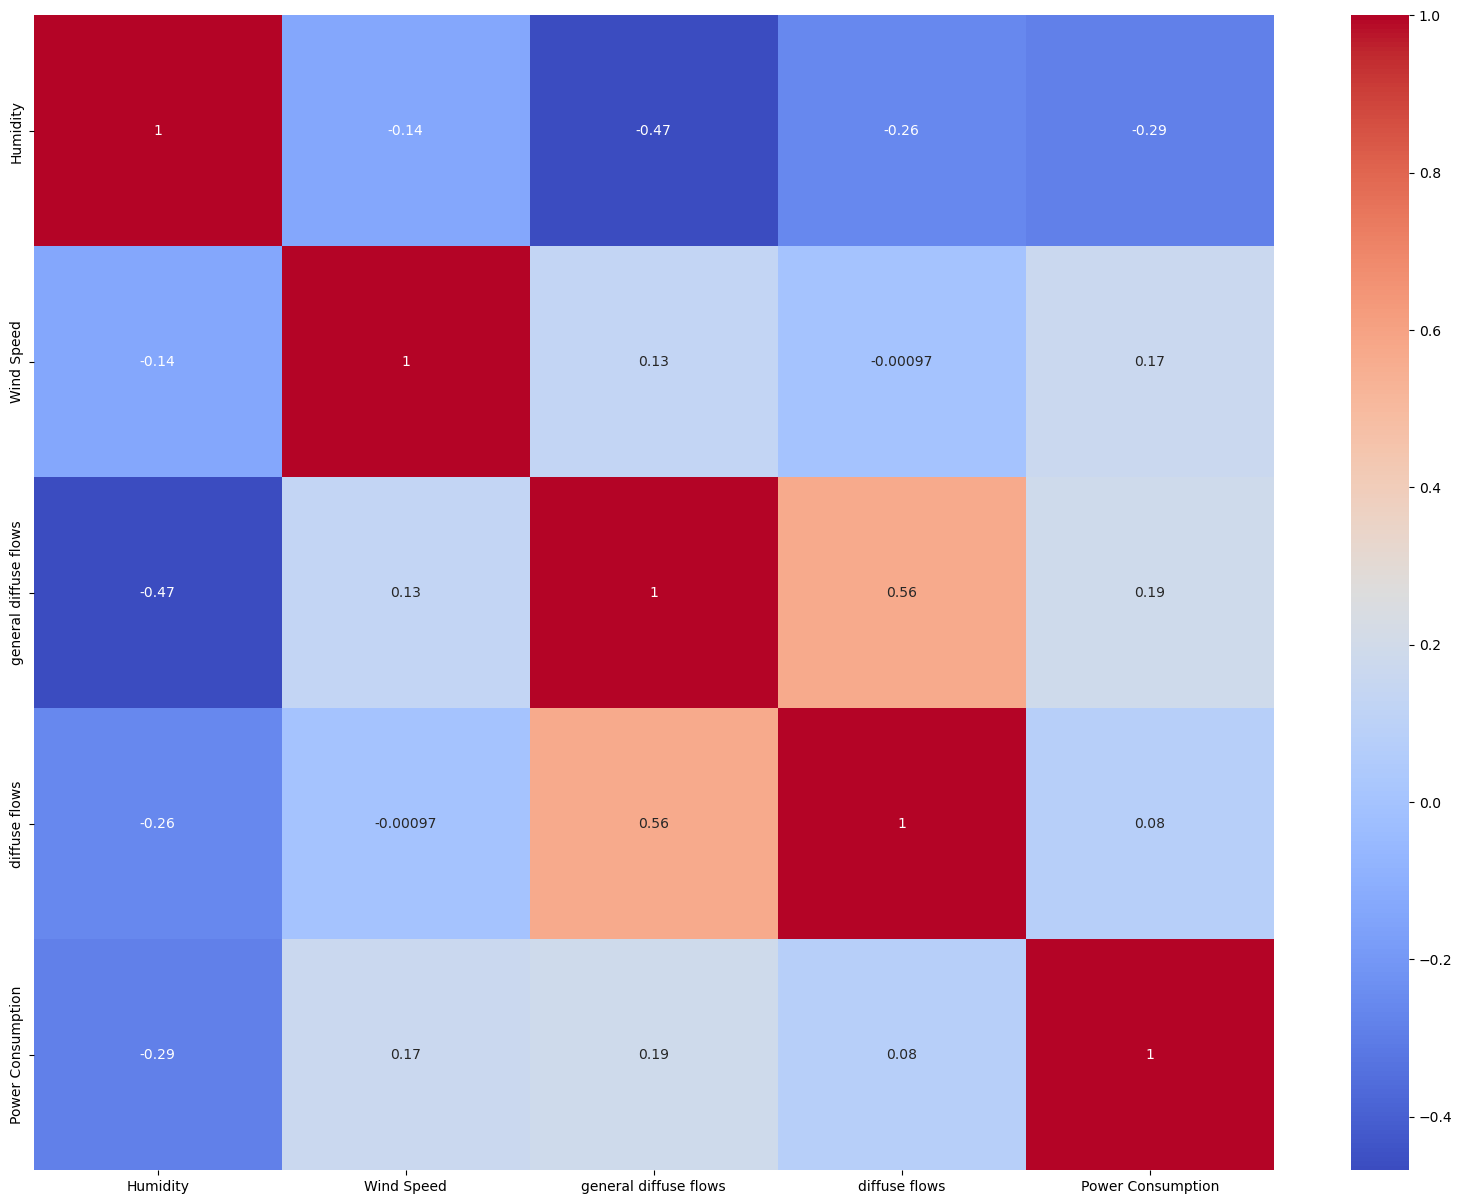

In [10]:
plt.figure(figsize = (20,15))
sns.heatmap(correlations, annot = True, cmap = "coolwarm")

In [11]:
correlations

,Humidity,Wind Speed,general diffuse flows,diffuse flows,Power Consumption
Humidity,1.000000,-0.135853,-0.468138,-0.256886,-0.287421
Wind Speed,-0.135853,1.000000,0.133733,-0.000972,0.167444
general diffuse flows,-0.468138,0.133733,1.000000,0.564718,0.187965
diffuse flows,-0.256886,-0.000972,0.564718,1.000000,0.080274
Power Consumption,-0.287421,0.167444,0.187965,0.080274,1.000000


# 2.

In [12]:
x = df["general diffuse flows"].values.reshape(-1, 1)
y = df["Power Consumption"].values.reshape(-1, 1)

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [14]:
y_pred = regressor.predict(x_test)

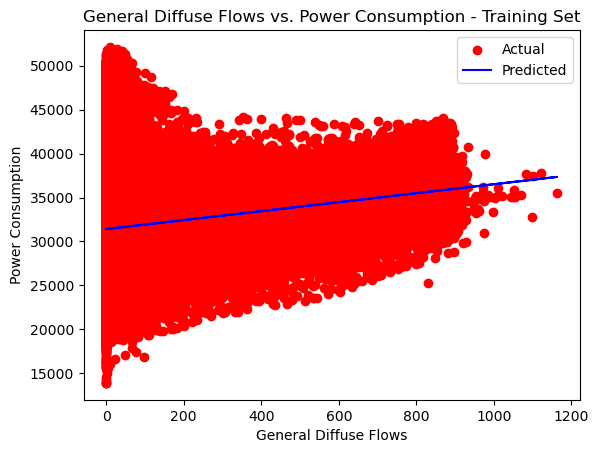

In [15]:
plt.scatter(x_train, y_train, color = 'red', label = "Actual")
plt.plot(x_train, regressor.predict(x_train), color = 'blue', label = "Predicted")
plt.title('General Diffuse Flows vs. Power Consumption - Training Set')
plt.xlabel('General Diffuse Flows')
plt.ylabel('Power Consumption')
plt.legend()
plt.show()

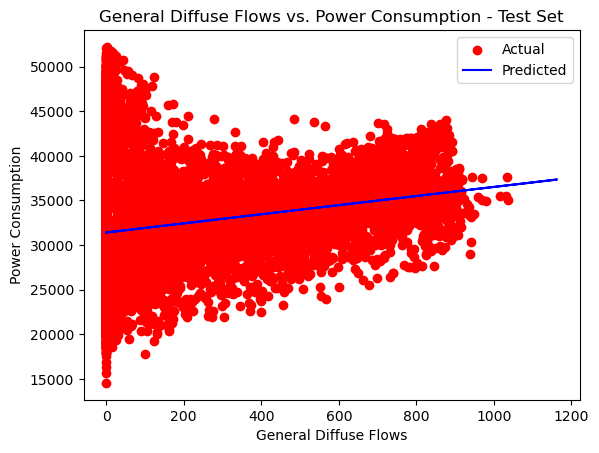

In [16]:
plt.scatter(x_test, y_test, color = 'red', label = "Actual")
plt.plot(x_train, regressor.predict(x_train), color = 'blue', label = "Predicted")
plt.title('General Diffuse Flows vs. Power Consumption - Test Set')
plt.xlabel('General Diffuse Flows')
plt.ylabel('Power Consumption')
plt.legend()
plt.show()

In [17]:
import sklearn.metrics as sm

print("Accuracy / R^2 score =", round(sm.r2_score(y_test, y_pred), 2))

Accuracy / R^2 score = 0.03


- Resource 5: https://subscription.packtpub.com/book/data/9781789808452/1/ch01lvl1sec12/computing-regression-accuracy

In [18]:
x = df["Wind Speed"].values.reshape(-1, 1)
y = df["Power Consumption"].values.reshape(-1, 1)

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [20]:
y_pred = regressor.predict(x_test)

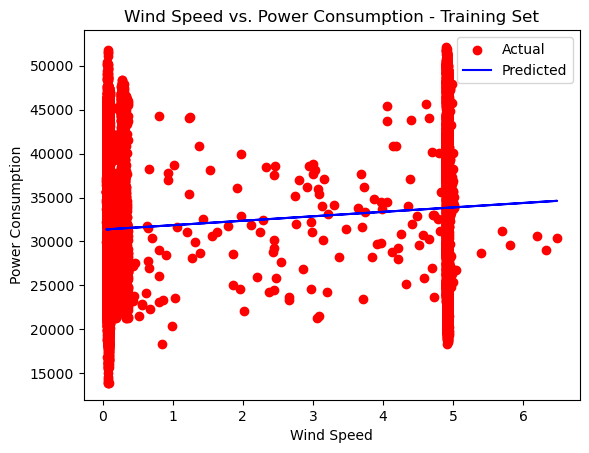

In [21]:
plt.scatter(x_train, y_train, color = 'red', label = "Actual")
plt.plot(x_train, regressor.predict(x_train), color = 'blue', label = "Predicted")
plt.title('Wind Speed vs. Power Consumption - Training Set')
plt.xlabel('Wind Speed')
plt.ylabel('Power Consumption')
plt.legend()
plt.show()

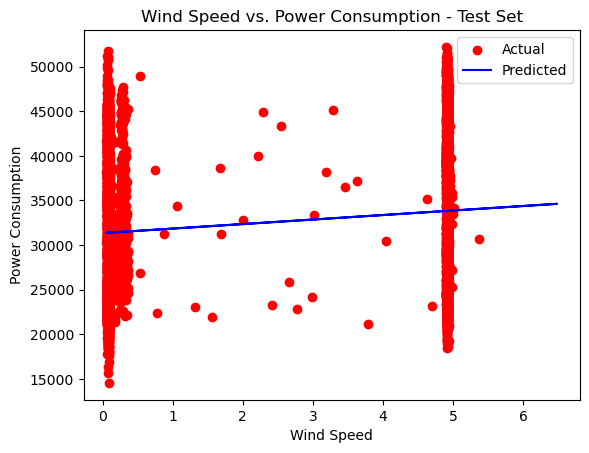

In [22]:
plt.scatter(x_test, y_test, color = 'red', label = "Actual")
plt.plot(x_train, regressor.predict(x_train), color = 'blue', label = "Predicted")
plt.title('Wind Speed vs. Power Consumption - Test Set')
plt.xlabel('Wind Speed')
plt.ylabel('Power Consumption')
plt.legend()
plt.show()

In [23]:
import sklearn.metrics as sm

print("Accuracy / R^2 score =", round(sm.r2_score(y_test, y_pred), 2))

Accuracy / R^2 score = 0.03


# 3.

In [24]:
x = df[["Wind Speed"]].values
y = df["Power Consumption"].values

In [25]:
from sklearn.preprocessing import PolynomialFeatures

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

poly_reg = PolynomialFeatures(degree = 2)
x_poly_train = poly_reg.fit_transform(x_train)
x_poly_test = poly_reg.transform(x_test)
line_reg = LinearRegression()
line_reg.fit(x_poly_train, y_train)

LinearRegression()

In [26]:
y_pred = line_reg.predict(x_poly_test)

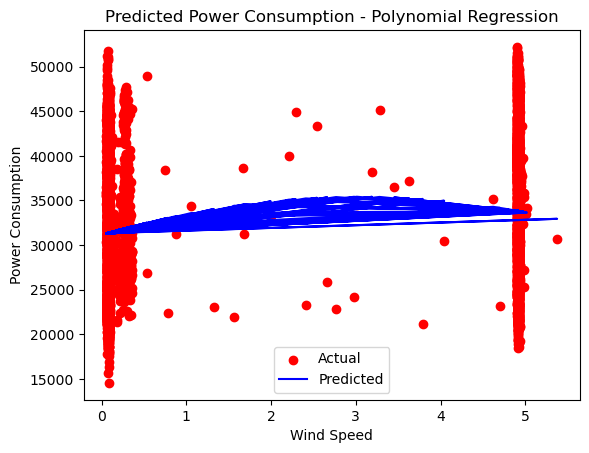

In [27]:
plt.scatter(x_test, y_test, color='red', label = 'Actual')
plt.plot(x_test, y_pred, color='blue', label = 'Predicted')
plt.xlabel('Wind Speed')
plt.ylabel('Power Consumption')
plt.title('Predicted Power Consumption - Polynomial Regression')
plt.legend()
plt.show()

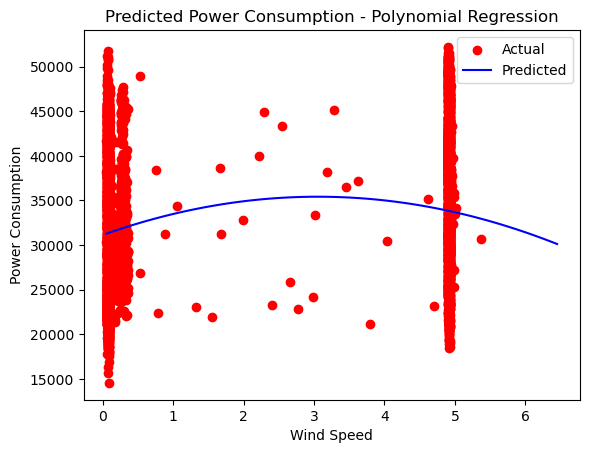

In [28]:
import numpy as np

x_grid = np.arange(min(x), max(x), 0.1)
x_grid = x_grid.reshape((len(x_grid), 1))
plt.scatter(x_test, y_test, color = 'red', label = "Actual")
plt.plot(x_grid, line_reg.predict(poly_reg.fit_transform(x_grid)), color = 'blue', label = "Predicted")
plt.title('Predicted Power Consumption - Polynomial Regression')
plt.xlabel('Wind Speed')
plt.ylabel('Power Consumption')
plt.legend()
plt.show()

In [29]:
print("Accuracy / R^2 score =", round(sm.r2_score(y_test, y_pred), 2))

Accuracy / R^2 score = 0.03


# 4.

In [30]:
df = df[["Wind Speed", "general diffuse flows", "diffuse flows","Power Consumption"]]

x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [31]:
y_pred = regressor.predict(x_test)

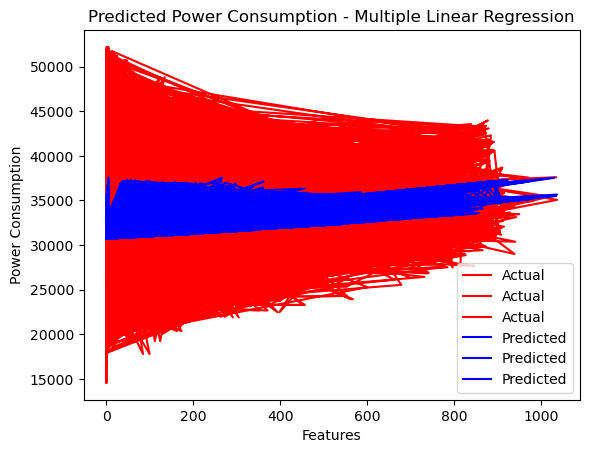

In [32]:
plt.plot(x_test, y_test, color = 'red', label = "Actual")
plt.plot(x_test, y_pred, color = 'blue', label = "Predicted")
plt.xlabel('Features')
plt.ylabel('Power Consumption')
plt.title('Predicted Power Consumption - Multiple Linear Regression')
plt.legend()
plt.show()

In [33]:
print("Accuracy / R^2 score =", round(regressor.score(x_test, y_test), 2))

Accuracy / R^2 score = 0.06


# 5.

  For question 1, I analyzed the multicollinearity in the dataset. I did so by using the variance inflation factor, or VIF. The higher the VIF, the more correlated a predictor is with the others and the less likely it is that the coefficient will be statistically significant. Temperature and Power Consumption had a VIF higher than 10, which meant there was significant multicollinearity that needed to be corrected. I did so by dropping the temperature. The new VIF values for every column besides Power Consumption were less than 10, so I kept the dataframe as is. Based on the new correlation table, I noticed that "general diffuse flows" and "Wind Speed" had the highest correlation to "Power Consumption." Therefore, I used both of these variables for question 2.
   
   I performed a simple linear regression for power consumption using "general diffuse flows" first. The results are visualized for the testing set and training set with labels above in question 2's answers. I used R-squared as a marker for accuracy as it is the proportion of variance in the outcome that is explained by the predictor (power consumption). While a higher the R-squared is ideal, ours was 0.03. This can be due to a few reasons: exclusion of variables, complex and nonlinear relationships and more. Despite this, the correct linear regression model was applied. "Wind Speed" also produced the same result, and can be explained for the same reason.
   
   Next, I performed the polynomial linear regression using "Wind Speed." This had a R-squared of 0.03, as well. This could be fixed by adding more relevant features or increasing the degree of the polynomial. Despite this, polynomial regression was applied to this model with a degree of 2. The results are visualized above.
   
   Lastly, I performed the multiple linear regression using "Wind Speed," "general diffuse flows" and "diffuse flows." As the visualization shows, there are three predicted lines within the data. Due to the amount of data, the lines are not perfectly clear and blend into one another. Interpretability might have been an issue with this model, as well as the quality of the data. Ultimately, I was able to successfully show the results via visualization. The R-square for this was 0.06. 
   
  


- Resource 6: https://www.investopedia.com/terms/v/variance-inflation-factor.asp#:~:text=The%20higher%20the%20VIF%2C%20the,that%20needs%20to%20be%20corrected
- Resource 7: http://www.sthda.com/english/articles/38-regression-model-validation/158-regression-model-accuracy-metrics-r-square-aic-bic-cp-and-more/#:~:text=R%2Dsquared%20(R2)%2C,squared%2C%20the%20better%20the%20model
- Resource 8: https://www.investopedia.com/terms/r/r-squared.asp#:~:text=However%2C%20it%20doesn't%20tell,ve%20chosen%20the%20right%20regression